In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("D:\\2_spring 2024\\0_deep learning\\data\\1\\PCARD_USER_CLASS_CD_4.csv")
df2 = pd.read_csv("D:\\2_spring 2024\\0_deep learning\\data\\2\\PCARD_USER_CLASS_CD_4.csv")
df3 = pd.read_csv("D:\\2_spring 2024\\0_deep learning\\data\\3\\PCARD_USER_CLASS_CD_4.csv")
df4 = pd.read_csv("D:\\2_spring 2024\\0_deep learning\\data\\4\\PCARD_USER_CLASS_CD_4.csv")
df5 = pd.read_csv("D:\\2_spring 2024\\0_deep learning\\data\\5\\PCARD_USER_CLASS_CD_4.csv")
df6 = pd.read_csv("D:\\2_spring 2024\\0_deep learning\\data\\6\\PCARD_USER_CLASS_CD_4.csv")
df7 = pd.read_csv("D:\\2_spring 2024\\0_deep learning\\data\\7\\PCARD_USER_CLASS_CD_4.csv")
df = pd.concat([df1,df2,df3,df4,df5,df6,df7], ignore_index=True)
print(df)

                 PCARD_NO      TRIP_START_TIME        TRIP_END_TIME  \
0        000E0B000033603G  2013-12-15 09:54:01  2013-12-15 11:36:20   
1        000E0B000033603G  2013-12-15 14:53:51  2013-12-15 15:08:13   
2        000E0B000033603G  2013-12-15 16:58:12  2013-12-15 17:13:20   
3        000E0B000035BGC5  2013-12-15 21:13:57  2013-12-15 23:00:44   
4        000E0B000035BGFF  2013-12-15 16:38:32  2013-12-15 22:27:40   
...                   ...                  ...                  ...   
3482918        GFE0B9E0C6  2013-12-21 23:05:05  2013-12-21 09:51:04   
3482919        GG53BFCE65  2013-12-21 11:53:19  2013-12-21 12:37:08   
3482920        GG636503EF  2013-12-21 11:28:31  2013-12-21 17:07:21   
3482921        GG636503EF  2013-12-21 17:07:31  2013-12-21 16:17:08   
3482922        GGFE090FBC  2013-12-21 18:17:37  2013-12-21 22:58:46   

         ORIGIN_STA_ID  DESTINATION_STA_ID        TIME_CATEGORY  
0              9011513              8809.0    Morning Peak (MP)  
1              

In [3]:


def find_valid_places(df):
    results = []
    
    for pcard in df['PCARD_NO'].unique():
        filtered_rows = df[df['PCARD_NO'] == pcard]
        
        # Morning Peak (MP)
        morning_peak_group = filtered_rows[filtered_rows['TIME_CATEGORY'] == 'Morning Peak (MP)'].groupby('ORIGIN_STA_ID').size()
        home_station = morning_peak_group.idxmax() if not morning_peak_group.empty else None

        # Afternoon Peak (AP)
        afternoon_peak_group = filtered_rows[filtered_rows['TIME_CATEGORY'] == 'Afternoon Peak (AP)'].groupby('DESTINATION_STA_ID').size()
        workplace_station = afternoon_peak_group.idxmax() if not afternoon_peak_group.empty else None

        # Non-Peak (NP)
        non_peak_group = filtered_rows[filtered_rows['TIME_CATEGORY'] == 'Non-Peak (NP)'].groupby('DESTINATION_STA_ID').size()
        other_activity_location = non_peak_group.idxmax() if not non_peak_group.empty else None
        
        # Check if all three locations are non-null and append to results if true
        if home_station and workplace_station and other_activity_location:
            results.append({
                'PCARD_NO': pcard, 
                'Home_Station': home_station, 
                'Workplace_Station': workplace_station, 
                'Other_Activity_Location': other_activity_location
            })
            # Stop if we have found the first 20 PCards with all locations defined
            if len(results) == 20:
                break
    
    return pd.DataFrame(results)

# Example usage
# Assume df has 'TIME_CATEGORY' properly set and categorizes 'RIDE_DTIME' before calling this function
result_df = find_valid_places(df)
print(result_df)


            PCARD_NO  Home_Station  Workplace_Station  Other_Activity_Location
0   000E0B000033603G       9011513              426.0                  72260.0
1   000E0E0000G50050         10204              240.0                   1801.0
2   000E0E0000G5E0CG          9168            73880.0                  72028.0
3   000E0E00030CC05E          9536             4119.0                8002607.0
4   000E0E0003E65G63         73678          8501137.0                  70143.0
5   000E0E0003EG0656         72570              339.0                  71611.0
6   000E0E000F6E9GF3         72241            72246.0                  72246.0
7   000E0E000GCC9GE0       9011252             2645.0                   2645.0
8   000E0E000GCEBB0C         75787             2645.0                8002819.0
9   000E0E00300E0656         72079             2717.0                   2717.0
10  000E0E0030G0E0CE         11314          8000536.0                9000112.0
11  000E0E0030G0EEBG           417              417.

In [3]:
import pandas as pd

def find_valid_places(df):
    results = []
    
    # Find the most frequently used PCARD_NOs
    most_frequent_cards = df['PCARD_NO'].value_counts().nlargest(20).index.tolist()
    
    # Filter dataframe for only these most frequent PCARD_NOs
    df = df[df['PCARD_NO'].isin(most_frequent_cards)]
    
    for pcard in most_frequent_cards:
        filtered_rows = df[df['PCARD_NO'] == pcard]
        
        # Morning Peak (MP)
        morning_peak_group = filtered_rows[filtered_rows['TIME_CATEGORY'] == 'Morning Peak (MP)'].groupby('ORIGIN_STA_ID').size()
        home_station = morning_peak_group.idxmax() if not morning_peak_group.empty else None

        # Afternoon Peak (AP)
        afternoon_peak_group = filtered_rows[filtered_rows['TIME_CATEGORY'] == 'Afternoon Peak (AP)'].groupby('DESTINATION_STA_ID').size()
        workplace_station = afternoon_peak_group.idxmax() if not afternoon_peak_group.empty else None

        # Non-Peak (NP)
        non_peak_group = filtered_rows[filtered_rows['TIME_CATEGORY'] == 'Non-Peak (NP)'].groupby('DESTINATION_STA_ID').size()
        other_activity_location = non_peak_group.idxmax() if not non_peak_group.empty else None
        
        # Check if all three locations are non-null and append to results if true
        if home_station and workplace_station and other_activity_location:
            results.append({
                'PCARD_NO': pcard, 
                'Home_Station': home_station, 
                'Workplace_Station': workplace_station, 
                'Other_Activity_Location': other_activity_location
            })
    
    return pd.DataFrame(results)

# Example usage
# Assume df has 'TIME_CATEGORY' properly set and categorizes 'RIDE_DTIME' before calling this function
result_df = find_valid_places(df)
print(result_df)


                PCARD_NO  Home_Station  Workplace_Station  \
0       00FE0F00E3F6C09B          9447             9650.0   
1       000E0E0GBFF3095C         10670          8002636.0   
2       000E0E05E9FB53FB          9364              239.0   
3   E00E000G0E003BCFFF56          4108             3117.0   
4       E50E0E9039E0C5GB       9011523              203.0   
5       000E0E0GCEF359CG         72817              225.0   
6       E50E0E900E3CEB9B          2511              239.0   
7       00FE0F00G3C056EE           216              215.0   
8       000E0E0GFG69E63G          9416              239.0   
9       00FE0F00GB3BC0EE          2626             2626.0   
10      000E0E0FBEFFG03C          2559              228.0   
11      E50E0E90G0B06065       8501091            70959.0   
12      000E0E0CCE3E300E       9004289             4107.0   
13      000E0E06FFF0G9E9           327             9143.0   
14      000E0E0C636EBBB5         60060              222.0   
15      00FE0F00G5BF030C

: 

C:\Users\suman\AppData\Local\Temp\ipykernel_31512\3656139967.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_times['TRIP_START_TIME'] = pd.to_datetime(home_times['TRIP_START_TIME'])


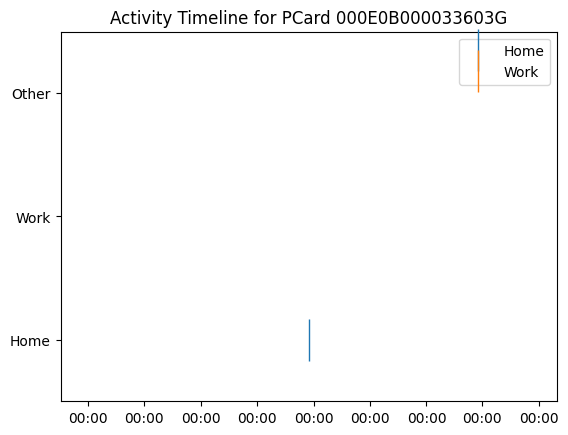

: 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

def plot_pcard_timeline(df, pcard_info, pcard_number):
    # Filter the data for the specified PCard
    pcard_data = df[df['PCARD_NO'] == pcard_number]

    # Set the figure and format the dates for plotting
    fig, ax = plt.subplots()
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

    # Home, Work, and Other Activity Times
    for index, row in pcard_info.iterrows():
        if row['PCARD_NO'] == pcard_number:
            home_times = pcard_data[pcard_data['ORIGIN_STA_ID'] == row['Home_Station']]
            work_times = pcard_data[pcard_data['ORIGIN_STA_ID'] == row['Workplace_Station']]
            
            # Ensure 'RIDE_DTIME' is converted to datetime if not already
            home_times['TRIP_START_TIME'] = pd.to_datetime(home_times['TRIP_START_TIME'])
            work_times['TRIP_START_TIME'] = pd.to_datetime(work_times['TRIP_START_TIME'])
            
            ax.plot(home_times['TRIP_START_TIME'], [1]*len(home_times), '|', markersize=30, label='Home')
            ax.plot(work_times['TRIP_START_TIME'], [2]*len(work_times), '|', markersize=30, label='Work')
            
    # Setting the legend and labels
    ax.set_yticks([1, 2, 3])
    ax.set_yticklabels(['Home', 'Work', 'Other'])
    ax.set_ylim(0.5, 3.5)
    ax.set_title(f"Activity Timeline for PCard {pcard_number}")
    plt.legend()

    plt.show()

# Example usage:
# Assume 'df' is your dataset with detailed PCard activity logs
# and 'pcard_info_df' is the DataFrame shown in your image with home, workplace, and other activity locations.
pcard_number = '000E0B000033603G'  # Example PCard number
filtered_rows = result_df[result_df['PCARD_NO'] == pcard_number]

plot_pcard_timeline(df, filtered_rows, pcard_number)
